## Visualize the cells of one spheroid in 3D. 


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.ticker as ticker
%matplotlib inline
# %matplotlib widget

# Set current working directory
print(os.getcwd())
os.chdir('/share/data/analyses/christa/colopaint3D_fork/spher_colo52_v1')
print(os.getcwd())

/share/data/analyses/christa/colopaint3D_fork/spher_colo52_v1/3_Figure2/CellDetectionSanityCheck
/share/data/analyses/christa/colopaint3D_fork/spher_colo52_v1


In [2]:
# # Pick an example well HCT116 #TODO: double-check the example images
# cell_line = 'HCT116'
# well = 'D12'
# barcode = 'PB000137'

# Pick an example well HT29
cell_line = 'HT29'
well = 'K11'
barcode = 'PB000142'

In [3]:
file = ('1_Data/FeaturesImages_150125_none/SingleCell/{}.parquet').format(cell_line)
df = pd.read_parquet(file) # Go for one spheroid at first

In [4]:
# Save the data
ImagesOut = '3_Figure2/CellDetectionSanityCheck/result-images/'

if not os.path.exists(ImagesOut): 
        os.makedirs(ImagesOut)

In [5]:
# Set up the plotting parameters
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
dpi = 300
figformat = 'pdf'

### Do the plotting

In [6]:
dfSingleSpheroid = df.query('Metadata_Well == @well & Metadata_Barcode == @barcode')[['Metadata_Site', 'Location_Center_X_cells', 'Location_Center_Y_cells']]

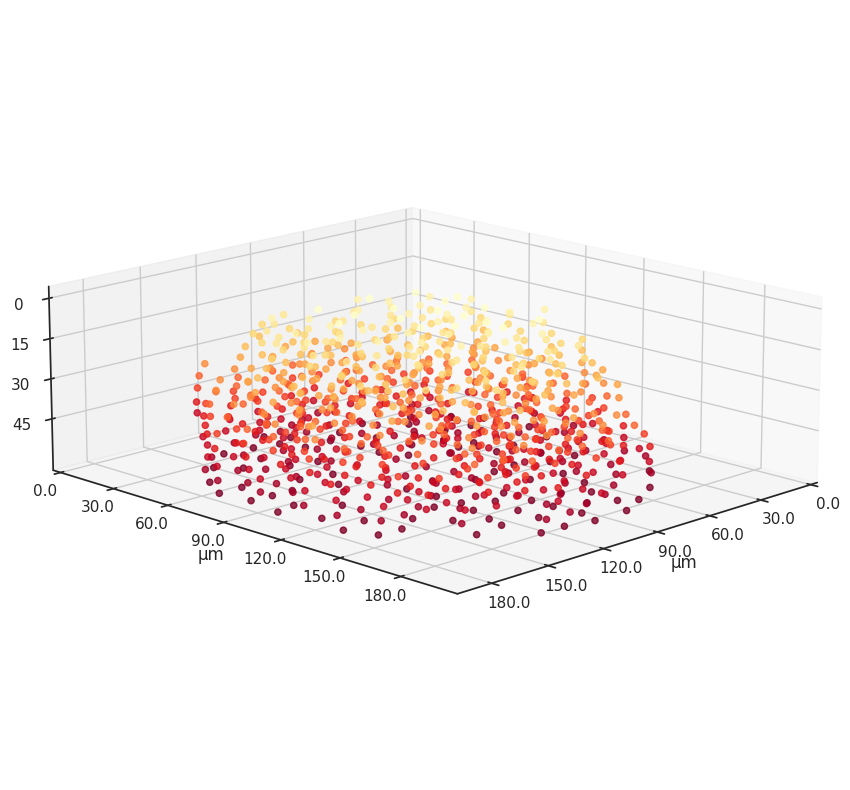

In [7]:
sns.set(style = "white")

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

x = dfSingleSpheroid['Location_Center_X_cells'] # X_location
y = dfSingleSpheroid['Location_Center_Y_cells'] # Y_location
z = dfSingleSpheroid['Metadata_Site'] # plane

x_res = 0.227 # µm per pixel
y_res = 0.227 # µm per pixel
z_res = 5 # µm per plane

ax.set_xlabel("µm")
ax.set_ylabel("µm") 
ax.set_zlabel("µm") 

# cm = plt.cm.get_cmap('YlOrRd')
scatter_plot = ax.scatter3D(x, y, z, c=dfSingleSpheroid['Metadata_Site'],  cmap='YlOrRd', s=20, alpha=0.8)
# plt.colorbar(scatter_plot, label='Slice')


zticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x*z_res))
ax.zaxis.set_major_formatter(zticks)

ax.invert_zaxis()

xticks = ticker.FuncFormatter(lambda x, pos: '{0:.1f}'.format(x*x_res))
ax.xaxis.set_major_formatter(xticks)

yticks = ticker.FuncFormatter(lambda x, pos: '{0:.1f}'.format(x*y_res))
ax.yaxis.set_major_formatter(yticks)

m = max(y*x_res)

plt.xticks(np.arange(0, m, 30)/x_res)
plt.yticks(np.arange(0, m, 30)/y_res)
ax.set_zticks(np.arange(0, max(z*z_res), 15)/z_res)
ax.set_box_aspect((np.ptp(x*x_res), np.ptp(y*x_res), np.ptp(z*z_res)))



# Set initial view angle
ax.view_init(elev=15, azim=45)  

fig.savefig(
        "{}Detected_Cells_Spheroid_{}_{}_{}.{}".format(ImagesOut,cell_line,well,barcode,figformat), dpi=dpi, bbox_inches="tight"
        )

plt.show()